In [1]:
import pandas as pd
import json

test_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/test_optimized.parquet'
train_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/train_optimized.parquet'
products_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_products_transformed.parquet'
user_details_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_users_transformed.parquet'

# Merge datasets

## Cargamos los datasets

In [2]:
# Cargar los datasets
test = pd.read_parquet(test_data_path)
train = pd.read_parquet(train_data_path)
products = pd.read_parquet(products_data_path)
user_details = pd.read_parquet(user_details_path)

# Verificar las primeras filas de cada dataset cargado
print(test.info())
print(train.info())
print(products.info())
print(user_details.info())

print(test.head())
print(train.head())
print(products.head())
print(user_details.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29275 entries, 0 to 29274
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   session_id       29275 non-null  int32         
 1   date             29275 non-null  datetime64[ns]
 2   timestamp_local  29275 non-null  datetime64[ns]
 3   user_id          29275 non-null  int32         
 4   country          29275 non-null  int8          
 5   partnumber       29275 non-null  int32         
 6   device_type      29275 non-null  int8          
 7   pagetype         29275 non-null  int8          
dtypes: datetime64[ns](2), int32(3), int8(3)
memory usage: 886.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   session_id       int32         
 1   date             datetime64[ns]
 2   timestamp_local  datet

## Paso 1: Unión del Dataset train con products

In [3]:
print(train['partnumber'].dtype)
print(products['partnumber'].dtype)

int32
int32


In [4]:
train_merged = pd.merge(
    train,
    products,
    on='partnumber',
    how='left',
    indicator=True  # Nos permitirá ver el resultado de la unión
)

In [5]:
# Revisar el conteo de cada categoría en el indicador de unión
print(train_merged['_merge'].value_counts())

_merge
both          46551445
left_only            0
right_only           0
Name: count, dtype: int64


In [6]:
# Obtener todas las columnas de products excepto 'partnumber'
product_cols = [col for col in products.columns if col != 'partnumber']
# Contar valores nulos en las columnas de products dentro de train_merged
null_counts = train_merged[product_cols].isnull().sum()
print(null_counts)
# Calcular la proporción de valores nulos
total_records = len(train_merged)
null_proportions = (null_counts / total_records) * 100
print(null_proportions)

discount             0
color_id             0
cod_section          0
family               0
embedding_reduced    0
dtype: int64
discount             0.0
color_id             0.0
cod_section          0.0
family               0.0
embedding_reduced    0.0
dtype: float64


## Paso 2: Unión del Dataset test con products

In [7]:
print(test['partnumber'].dtype)
print(products['partnumber'].dtype)

int32
int32


In [8]:
test_merged = pd.merge(
    test,
    products,
    on='partnumber',
    how='left',
    indicator=True  # Para analizar el resultado de la unión
)

In [9]:
print(test_merged['_merge'].value_counts())

_merge
both          29275
left_only         0
right_only        0
Name: count, dtype: int64


In [10]:
# Columnas de products (excepto 'partnumber')
product_cols = [col for col in products.columns if col != 'partnumber']

# Contar valores nulos
null_counts = test_merged[product_cols].isnull().sum()
print(null_counts)

# Proporción de valores nulos
total_records = len(test_merged)
null_proportions = (null_counts / total_records) * 100
print(null_proportions)

discount             0
color_id             0
cod_section          0
family               0
embedding_reduced    0
dtype: int64
discount             0.0
color_id             0.0
cod_section          0.0
family               0.0
embedding_reduced    0.0
dtype: float64


In [11]:
print(test_merged.head())

   session_id       date         timestamp_local  user_id  country  \
0         746 2024-06-15 2024-06-15 18:36:47.390       -1       57   
1         746 2024-06-15 2024-06-15 18:37:04.052       -1       57   
2         746 2024-06-15 2024-06-15 18:37:48.159       -1       57   
3         746 2024-06-15 2024-06-15 18:38:19.899       -1       57   
4         746 2024-06-15 2024-06-15 18:38:46.492       -1       57   

   partnumber  device_type  pagetype  discount  color_id  cod_section  family  \
0        1254            1        24         0       404            1      30   
1       32544            1        24         0       219            1     146   
2       12639            1        24         0        83            1      53   
3       18048            1        24         0        53            1      29   
4       13295            1        24         0       181            1      51   

                                   embedding_reduced _merge  
0  [-4.8152103, -0.572029, -0.

## Paso intermedio - .info()

In [12]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   session_id         int32         
 1   date               datetime64[ns]
 2   timestamp_local    datetime64[ns]
 3   add_to_cart        int8          
 4   user_id            int32         
 5   country            int8          
 6   partnumber         int32         
 7   device_type        int8          
 8   pagetype           int8          
 9   discount           int8          
 10  color_id           int32         
 11  cod_section        int8          
 12  family             int32         
 13  embedding_reduced  object        
 14  _merge             category      
dtypes: category(1), datetime64[ns](2), int32(5), int8(6), object(1)
memory usage: 2.2+ GB


In [13]:
test_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29275 entries, 0 to 29274
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   session_id         29275 non-null  int32         
 1   date               29275 non-null  datetime64[ns]
 2   timestamp_local    29275 non-null  datetime64[ns]
 3   user_id            29275 non-null  int32         
 4   country            29275 non-null  int8          
 5   partnumber         29275 non-null  int32         
 6   device_type        29275 non-null  int8          
 7   pagetype           29275 non-null  int8          
 8   discount           29275 non-null  int8          
 9   color_id           29275 non-null  int32         
 10  cod_section        29275 non-null  int8          
 11  family             29275 non-null  int32         
 12  embedding_reduced  29275 non-null  object        
 13  _merge             29275 non-null  category      
dtypes: cat

In [14]:
user_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577494 entries, 0 to 577493
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  577494 non-null  int32  
 1   country  577494 non-null  int8   
 2   R        577494 non-null  float32
 3   F        577494 non-null  float32
 4   M        577494 non-null  float32
dtypes: float32(3), int32(1), int8(1)
memory usage: 9.4 MB


## Paso 3: Unión del Dataset train_merged con user_details

In [15]:
# Eliminar la columna '_merge' de train_merged
train_merged = train_merged.drop(columns=['_merge'])

# Ahora puedes realizar el merge con user_details
train_full = pd.merge(
    train_merged,
    user_details,
    on='user_id',
    how='left',
    indicator=True  # Para analizar el resultado de la unión
)

In [16]:
# Verificar el resultado del merge
print(train_full['_merge'].value_counts())

_merge
left_only     39694715
both           7118844
right_only           0
Name: count, dtype: int64


In [17]:
num_anonymous = (train_merged['user_id'] == -1).sum()
print(f"Número de registros con user_id = -1: {num_anonymous}")

Número de registros con user_id = -1: 39694715


In [18]:
# Crear máscara para registros en 'left_only'
left_only_mask = (train_full['_merge'] == 'left_only')

# De esos registros, identificar los que tienen 'user_id' distinto de -1
missing_users_mask = left_only_mask & (train_full['user_id'] != -1)

missing_users_count = missing_users_mask.sum()
print(f"Número de registros con user_id != -1 sin correspondencia en user_details: {missing_users_count}")

Número de registros con user_id != -1 sin correspondencia en user_details: 0


In [19]:
# Crear columna 'anonymous_user'
train_full['anonymous_user'] = (train_full['user_id'] == -1).astype('int8')

In [20]:
median_R = user_details['R'].median()
median_F = user_details['F'].median()
median_M = user_details['M'].median()

In [21]:
anonymous_mask = train_full['anonymous_user'] == 1

train_full.loc[anonymous_mask, 'R'] = median_R
train_full.loc[anonymous_mask, 'F'] = median_F
train_full.loc[anonymous_mask, 'M'] = median_M

In [22]:
# Usar 'country_y' cuando esté disponible, y si no, 'country_x'
train_full['country'] = train_full['country_y'].fillna(train_full['country_x']).astype('int8')

# Eliminar las columnas duplicadas
train_full.drop(['country_x', 'country_y'], axis=1, inplace=True)

In [23]:
null_counts = train_full[['R', 'F', 'M']].isnull().sum()
print(null_counts)

R    0
F    0
M    0
dtype: int64


In [24]:
train_full['R'] = train_full['R'].astype('float32')
train_full['F'] = train_full['F'].astype('float32')
train_full['M'] = train_full['M'].astype('float32')
train_full['anonymous_user'] = train_full['anonymous_user'].astype('int8')

In [25]:
print(train_full.info())
print(train_full.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46813559 entries, 0 to 46813558
Data columns (total 19 columns):
 #   Column             Dtype         
---  ------             -----         
 0   session_id         int32         
 1   date               datetime64[ns]
 2   timestamp_local    datetime64[ns]
 3   add_to_cart        int8          
 4   user_id            int32         
 5   partnumber         int32         
 6   device_type        int8          
 7   pagetype           int8          
 8   discount           int8          
 9   color_id           int32         
 10  cod_section        int8          
 11  family             int32         
 12  embedding_reduced  object        
 13  R                  float32       
 14  F                  float32       
 15  M                  float32       
 16  _merge             category      
 17  anonymous_user     int8          
 18  country            int8          
dtypes: category(1), datetime64[ns](2), float32(3), int32(5), int8

In [26]:
# Eliminar la columna '_merge' de 'train_full'
train_full.drop(columns=['_merge'], inplace=True)

## Paso 4: Unión del Dataset test_merged con user_details

In [27]:
print(test_merged['user_id'].dtype)
print(user_details['user_id'].dtype)

int32
int32


In [28]:
# Si existe la columna '_merge', elimínala
if '_merge' in test_merged.columns:
    test_merged.drop(columns=['_merge'], inplace=True)

In [29]:
test_full = pd.merge(
    test_merged,
    user_details,
    on='user_id',
    how='left',
    indicator=True  # Para analizar el resultado de la unión
)

In [30]:
print(test_full['_merge'].value_counts())

_merge
left_only     23509
both           6082
right_only        0
Name: count, dtype: int64


In [31]:
# Crear una máscara para registros en 'left_only'
left_only_mask = test_full['_merge'] == 'left_only'

# Contar cuántos de estos registros tienen 'user_id' igual a -1
anonymous_in_left_only = (test_full.loc[left_only_mask, 'user_id'] == -1)
num_anonymous = anonymous_in_left_only.sum()
print(f"Número de usuarios anónimos en 'left_only': {num_anonymous}")

Número de usuarios anónimos en 'left_only': 23509


In [32]:
# Identificar registros en 'left_only' con 'user_id' distinto de -1
logged_in_missing = (test_full.loc[left_only_mask, 'user_id'] != -1)
num_logged_in_missing = logged_in_missing.sum()
print(f"Número de usuarios logueados en 'left_only' sin información en 'user_details': {num_logged_in_missing}")

Número de usuarios logueados en 'left_only' sin información en 'user_details': 0


In [33]:
# Calcular las medianas de 'R', 'F', 'M' desde 'user_details'
median_R = user_details['R'].median()
median_F = user_details['F'].median()
median_M = user_details['M'].median()

# Imputar valores a los usuarios anónimos
anonymous_mask = test_full['user_id'] == -1
test_full.loc[anonymous_mask, 'R'] = median_R
test_full.loc[anonymous_mask, 'F'] = median_F
test_full.loc[anonymous_mask, 'M'] = median_M

In [34]:
test_full['anonymous_user'] = anonymous_mask.astype('int8')

In [35]:
missing_users_mask = (test_full['user_id'] != -1) & (test_full['R'].isnull())

# Imputar valores medianos
test_full.loc[missing_users_mask, 'R'] = median_R
test_full.loc[missing_users_mask, 'F'] = median_F
test_full.loc[missing_users_mask, 'M'] = median_M

In [36]:
test_full['missing_user_info'] = 0
test_full.loc[missing_users_mask, 'missing_user_info'] = 1
test_full['missing_user_info'] = test_full['missing_user_info'].astype('int8')

In [37]:
# Priorizar 'country_y' y usar 'country_x' cuando 'country_y' sea nulo
test_full['country'] = test_full['country_y'].fillna(test_full['country_x']).astype('int8')

# Eliminar las columnas duplicadas
test_full.drop(['country_x', 'country_y'], axis=1, inplace=True)

In [38]:
null_counts = test_full[['R', 'F', 'M']].isnull().sum()
print(null_counts)

R    0
F    0
M    0
dtype: int64


In [39]:
test_full['R'] = test_full['R'].astype('float32')
test_full['F'] = test_full['F'].astype('float32')
test_full['M'] = test_full['M'].astype('float32')

In [40]:
test_full.drop(columns=['_merge'], inplace=True)

In [41]:
print(test_full.info())
print(test_full.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29591 entries, 0 to 29590
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   session_id         29591 non-null  int32         
 1   date               29591 non-null  datetime64[ns]
 2   timestamp_local    29591 non-null  datetime64[ns]
 3   user_id            29591 non-null  int32         
 4   partnumber         29591 non-null  int32         
 5   device_type        29591 non-null  int8          
 6   pagetype           29591 non-null  int8          
 7   discount           29591 non-null  int8          
 8   color_id           29591 non-null  int32         
 9   cod_section        29591 non-null  int8          
 10  family             29591 non-null  int32         
 11  embedding_reduced  29591 non-null  object        
 12  R                  29591 non-null  float32       
 13  F                  29591 non-null  float32       
 14  M     

In [42]:
test_full.drop(columns=['missing_user_info'], inplace=True)

## Verificación de que train_full y test_full estén alineados

In [43]:
def verificar_alineacion(train_df, test_df, columna_diferente='add_to_cart'):
    """
    Verifica si dos DataFrames tienen las mismas columnas,
    permitiendo una diferencia específica.

    Parámetros:
    - train_df: DataFrame de entrenamiento (por ejemplo, train_full)
    - test_df: DataFrame de prueba (por ejemplo, test_full)
    - columna_diferente: Nombre de la columna que se permite que sea diferente (por defecto 'add_to_cart')

    Retorna:
    - True si los DataFrames están alineados (exceptuando la columna permitida).
    - False si hay diferencias adicionales.
    - Imprime información detallada de las diferencias encontradas.
    """
    # Obtener listas de columnas de cada DataFrame
    columnas_train = set(train_df.columns)
    columnas_test = set(test_df.columns)

    # Remover la columna diferente del conjunto de columnas de train_df
    columnas_train_sin_diferencia = columnas_train - set([columna_diferente])

    # Comparar los conjuntos de columnas
    columnas_solo_en_train = columnas_train_sin_diferencia - columnas_test
    columnas_solo_en_test = columnas_test - columnas_train_sin_diferencia

    if not columnas_solo_en_train and not columnas_solo_en_test:
        print("Los DataFrames están alineados. Las columnas son las mismas, exceptuando '{}'.".format(columna_diferente))
        return True
    else:
        print("Los DataFrames no están alineados. Hay diferencias en las columnas.")
        if columnas_solo_en_train:
            print("Columnas que están en train_df pero no en test_df:")
            print(columnas_solo_en_train)
        if columnas_solo_en_test:
            print("Columnas que están en test_df pero no en train_df:")
            print(columnas_solo_en_test)
        return False
    
verificar_alineacion(train_full, test_full)

Los DataFrames están alineados. Las columnas son las mismas, exceptuando 'add_to_cart'.


True

## Optimización tipo de datos

In [44]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46813559 entries, 0 to 46813558
Data columns (total 18 columns):
 #   Column             Dtype         
---  ------             -----         
 0   session_id         int32         
 1   date               datetime64[ns]
 2   timestamp_local    datetime64[ns]
 3   add_to_cart        int8          
 4   user_id            int32         
 5   partnumber         int32         
 6   device_type        int8          
 7   pagetype           int8          
 8   discount           int8          
 9   color_id           int32         
 10  cod_section        int8          
 11  family             int32         
 12  embedding_reduced  object        
 13  R                  float32       
 14  F                  float32       
 15  M                  float32       
 16  anonymous_user     int8          
 17  country            int8          
dtypes: datetime64[ns](2), float32(3), int32(5), int8(7), object(1)
memory usage: 2.7+ GB


In [45]:
# Verificar el tipo de datos de los elementos en la columna 'embedding_reduced'
embedding_type = type(train_full['embedding_reduced'].iloc[0])
print(f"Tipo de dato en 'embedding_reduced': {embedding_type}")


Tipo de dato en 'embedding_reduced': <class 'numpy.ndarray'>


## Guardado de dataset full

In [46]:
test_full.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/test_full.parquet', index=False)

In [47]:
# Guardar dataset en formato Parquet (más eficiente)
train_full.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/train_full.parquet', index=False)
print("Datasets guardados correctamente.")

Datasets guardados correctamente.


In [48]:
# Ruta para guardar el archivo comprimido
# output_path_csv = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/train_full.csv.gz'

# # Guardar como CSV comprimido
# train_full.to_csv(output_path_csv, index=False, compression='gzip')

# print("Dataset guardado correctamente en formato CSV comprimido.")


---

# Análisis de dataset completo


In [48]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46813559 entries, 0 to 46813558
Data columns (total 18 columns):
 #   Column             Dtype         
---  ------             -----         
 0   session_id         int32         
 1   date               datetime64[ns]
 2   timestamp_local    datetime64[ns]
 3   add_to_cart        int8          
 4   user_id            int32         
 5   partnumber         int32         
 6   device_type        int8          
 7   pagetype           int8          
 8   discount           int8          
 9   color_id           int32         
 10  cod_section        int8          
 11  family             int32         
 12  embedding_reduced  object        
 13  R                  float32       
 14  F                  float32       
 15  M                  float32       
 16  anonymous_user     int8          
 17  country            int8          
dtypes: datetime64[ns](2), float32(3), int32(5), int8(7), object(1)
memory usage: 2.7+ GB


In [49]:
train_full.head(10)

,session_id,date,timestamp_local,add_to_cart,user_id,partnumber,device_type,pagetype,discount,color_id,cod_section,family,embedding_reduced,R,F,M,anonymous_user,country
0,64,2024-06-06,2024-06-06 16:43:17.389,0,-1,14327,1,24,0,74,1,22,"[-4.1614, -1.9206808, 0.29082885, -0.11142825,...",0.427997,0.337763,0.213572,1,29
1,117,2024-06-08,2024-06-08 15:11:02.782,0,-1,38422,1,24,0,3,1,73,"[0.6177783, 5.1697874, 1.0802383, -2.3842714, ...",0.427997,0.337763,0.213572,1,57
2,117,2024-06-08,2024-06-08 15:11:44.797,0,-1,19763,1,24,0,3,1,156,"[-1.1826484, -1.6953706, -3.823473, 0.22190832...",0.427997,0.337763,0.213572,1,57
3,579,2024-06-05,2024-06-05 19:24:48.397,0,-1,30253,1,24,0,181,1,53,"[0.5049844, 1.4900526, -3.010233, 1.6853281, -...",0.427997,0.337763,0.213572,1,29
4,1220,2024-06-04,2024-06-04 08:21:13.476,0,480729,1592,1,24,0,85,1,73,"[-0.041926634, 5.6078444, 0.12900195, 2.553709...",0.255987,0.276302,0.213848,0,25
5,1220,2024-06-04,2024-06-04 08:21:09.139,0,480729,1592,1,24,0,85,1,73,"[-0.041926634, 5.6078444, 0.12900195, 2.553709...",0.255987,0.276302,0.213848,0,25
6,1220,2024-06-04,2024-06-04 08:21:11.955,0,480729,33771,1,24,0,83,1,73,"[0.14680453, 6.6099815, 1.3532311, 2.495807, 0...",0.255987,0.276302,0.213848,0,25
7,1222,2024-06-13,2024-06-13 06:22:03.307,0,-1,10763,1,24,0,64,2,4,"[-2.7094104, -1.7488836, 1.5389193, -0.6792314...",0.427997,0.337763,0.213572,1,57
8,1222,2024-06-13,2024-06-13 06:17:33.149,0,-1,14731,1,24,0,72,2,195,"[-4.220077, -1.927426, 4.5304337, 1.4908589, -...",0.427997,0.337763,0.213572,1,57
9,1222,2024-06-13,2024-06-13 06:17:57.411,0,-1,5249,1,24,0,83,1,196,"[3.542907, 1.170382, 1.3360965, 0.30384576, 1....",0.427997,0.337763,0.213572,1,57


In [52]:
train_full.describe()

,session_id,date,timestamp_local,add_to_cart,user_id,partnumber,device_type,pagetype,discount,color_id,cod_section,family,R,F,M,anonymous_user,country
count,4.681356e+07,46813559,46813559,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07,4.681356e+07
mean,2.582787e+06,2024-06-07 06:11:58.837736960,2024-06-07 21:12:19.923700736,5.909410e-02,4.231640e+04,2.171435e+04,1.143908e+00,2.390030e+01,6.614614e-02,1.738896e+02,1.495020e+00,8.771977e+01,4.247685e-01,3.389502e-01,2.140618e-01,8.479320e-01,3.642323e+01
min,1.000000e+00,2024-06-01 00:00:00,2024-06-01 02:00:00.051000,0.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.289868e+06,2024-06-04 00:00:00,2024-06-04 08:59:11.533999872,0.000000e+00,-1.000000e+00,1.105200e+04,1.000000e+00,2.400000e+01,0.000000e+00,6.400000e+01,1.000000e+00,5.100000e+01,4.279971e-01,3.377628e-01,2.135723e-01,1.000000e+00,2.900000e+01
50%,2.579870e+06,2024-06-07 00:00:00,2024-06-07 18:58:13.899000064,0.000000e+00,-1.000000e+00,2.164800e+04,1.000000e+00,2.400000e+01,0.000000e+00,1.290000e+02,1.000000e+00,7.300000e+01,4.279971e-01,3.377628e-01,2.135723e-01,1.000000e+00,2.900000e+01
75%,3.875433e+06,2024-06-11 00:00:00,2024-06-11 07:13:01.965999872,0.000000e+00,-1.000000e+00,3.242300e+04,1.000000e+00,2.400000e+01,0.000000e+00,3.070000e+02,1.000000e+00,1.500000e+02,4.279971e-01,3.377628e-01,2.135723e-01,1.000000e+00,5.700000e+01
max,5.171848e+06,2024-06-16 00:00:00,2024-06-16 22:11:17.725000,1.000000e+00,5.570060e+05,4.369200e+04,3.000000e+00,3.700000e+01,1.000000e+00,6.380000e+02,4.000000e+00,2.170000e+02,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.200000e+01
std,1.493405e+06,NaN,NaN,2.358007e-01,1.180284e+05,1.248664e+04,5.076810e-01,1.283467e+00,2.485374e-01,1.489367e+02,9.968480e-01,5.413622e+01,9.221751e-02,5.024896e-02,1.670275e-02,3.590868e-01,1.250859e+01


In [53]:
test_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29591 entries, 0 to 29590
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   session_id         29591 non-null  int32         
 1   date               29591 non-null  datetime64[ns]
 2   timestamp_local    29591 non-null  datetime64[ns]
 3   user_id            29591 non-null  int32         
 4   partnumber         29591 non-null  int32         
 5   device_type        29591 non-null  int8          
 6   pagetype           29591 non-null  int8          
 7   discount           29591 non-null  int8          
 8   color_id           29591 non-null  int32         
 9   cod_section        29591 non-null  int8          
 10  family             29591 non-null  int32         
 11  embedding_reduced  29591 non-null  object        
 12  R                  29591 non-null  float32       
 13  F                  29591 non-null  float32       
 14  M     

In [54]:
test_full['embedding_reduced']

0        [-4.8152113, -0.5720316, -0.41065776, -4.35293...
1        [-4.054006, -2.486813, 0.96072286, 0.33246863,...
2        [-1.8253272, 0.5022553, -1.4124593, 1.111519, ...
3        [1.2010709, -2.4243987, -0.004045471, 0.934904...
4        [5.233573, -1.2780368, 1.3953487, 0.048764564,...
                               ...                        
29586    [-1.5295029, 2.3226228, -0.83470404, 2.9792469...
29587    [-1.1259087, -0.0064404383, -1.9197867, 2.2058...
29588    [-1.4034009, -0.9720457, -0.0710423, -1.908242...
29589    [-0.7122817, -2.1542578, -0.5517262, -1.211443...
29590    [3.6568801, -2.047768, -3.1312513, -0.828148, ...
Name: embedding_reduced, Length: 29591, dtype: object

In [55]:
test_full.head()

,session_id,date,timestamp_local,user_id,partnumber,device_type,pagetype,discount,color_id,cod_section,family,embedding_reduced,R,F,M,anonymous_user,country
0,746,2024-06-15,2024-06-15 18:36:47.390,-1,1254,1,24,0,404,1,30,"[-4.8152113, -0.5720316, -0.41065776, -4.35293...",0.427997,0.337763,0.213572,1,57
1,746,2024-06-15,2024-06-15 18:37:04.052,-1,32544,1,24,0,219,1,146,"[-4.054006, -2.486813, 0.96072286, 0.33246863,...",0.427997,0.337763,0.213572,1,57
2,746,2024-06-15,2024-06-15 18:37:48.159,-1,12639,1,24,0,83,1,53,"[-1.8253272, 0.5022553, -1.4124593, 1.111519, ...",0.427997,0.337763,0.213572,1,57
3,746,2024-06-15,2024-06-15 18:38:19.899,-1,18048,1,24,0,53,1,29,"[1.2010709, -2.4243987, -0.004045471, 0.934904...",0.427997,0.337763,0.213572,1,57
4,746,2024-06-15,2024-06-15 18:38:46.492,-1,13295,1,24,0,181,1,51,"[5.233573, -1.2780368, 1.3953487, 0.048764564,...",0.427997,0.337763,0.213572,1,57


In [56]:
test_full.describe()

,session_id,date,timestamp_local,user_id,partnumber,device_type,pagetype,discount,color_id,cod_section,family,R,F,M,anonymous_user,country
count,2.959100e+04,29591,29591,29591.000000,29591.000000,29591.000000,29591.000000,29591.000000,29591.000000,29591.000000,29591.000000,29591.000000,29591.000000,29591.000000,29591.000000,29591.000000
mean,2.597160e+06,2024-06-15 12:09:45.421242880,2024-06-16 01:09:49.993582848,54697.367105,22090.574195,1.213038,23.140989,0.057585,179.691697,1.599236,91.945625,0.424646,0.339115,0.216256,0.794465,34.222770
min,7.460000e+02,2024-06-15 00:00:00,2024-06-15 00:00:35.309000,-1.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,1.314990e+06,2024-06-15 00:00:00,2024-06-15 13:50:26.757999872,-1.000000,11537.000000,1.000000,24.000000,0.000000,64.000000,1.000000,51.000000,0.427997,0.337763,0.213572,1.000000,25.000000
50%,2.608824e+06,2024-06-16 00:00:00,2024-06-16 00:17:29.008000,-1.000000,21777.000000,1.000000,24.000000,0.000000,135.000000,1.000000,73.000000,0.427997,0.337763,0.213572,1.000000,34.000000
75%,3.904152e+06,2024-06-16 00:00:00,2024-06-16 14:10:49.025499904,-1.000000,32881.000000,1.000000,24.000000,0.000000,312.000000,3.000000,153.000000,0.427997,0.337763,0.213572,1.000000,34.000000
max,5.168933e+06,2024-06-16 00:00:00,2024-06-16 23:55:50.519000,555819.000000,43679.000000,3.000000,26.000000,1.000000,621.000000,4.000000,210.000000,0.997899,0.689272,0.615459,1.000000,76.000000
std,1.497656e+06,NaN,NaN,129008.024277,12510.034482,0.603723,3.665591,0.232961,148.336993,0.989064,55.114663,0.109256,0.057286,0.018638,0.404099,10.608329


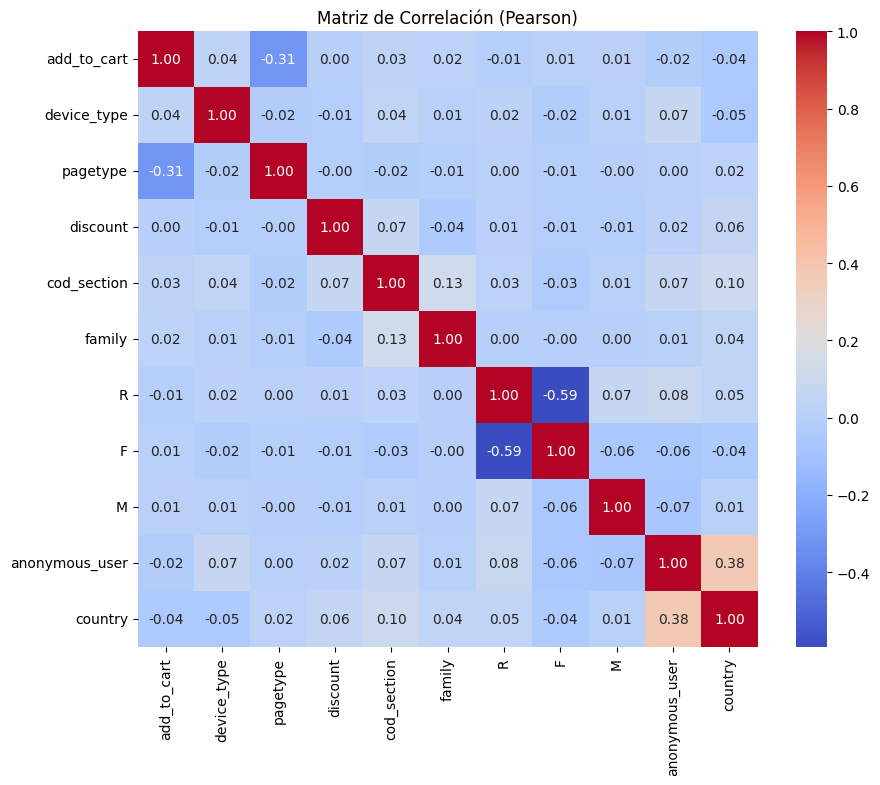

In [57]:
import pandas as pd

# Filtrar columnas numéricas que realmente quieras correlacionar:
cols_numeric = [
    "add_to_cart", "device_type", "pagetype", "discount", 
    "cod_section", "family", "R", "F", "M", 
    "anonymous_user", "country" 
]
df_corr = train_full[cols_numeric]

# Matriz de correlación con método Pearson (o Spearman si lo prefieres):
corr_matrix = df_corr.corr(method='pearson')

# Visualizar correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación (Pearson)")
plt.show()


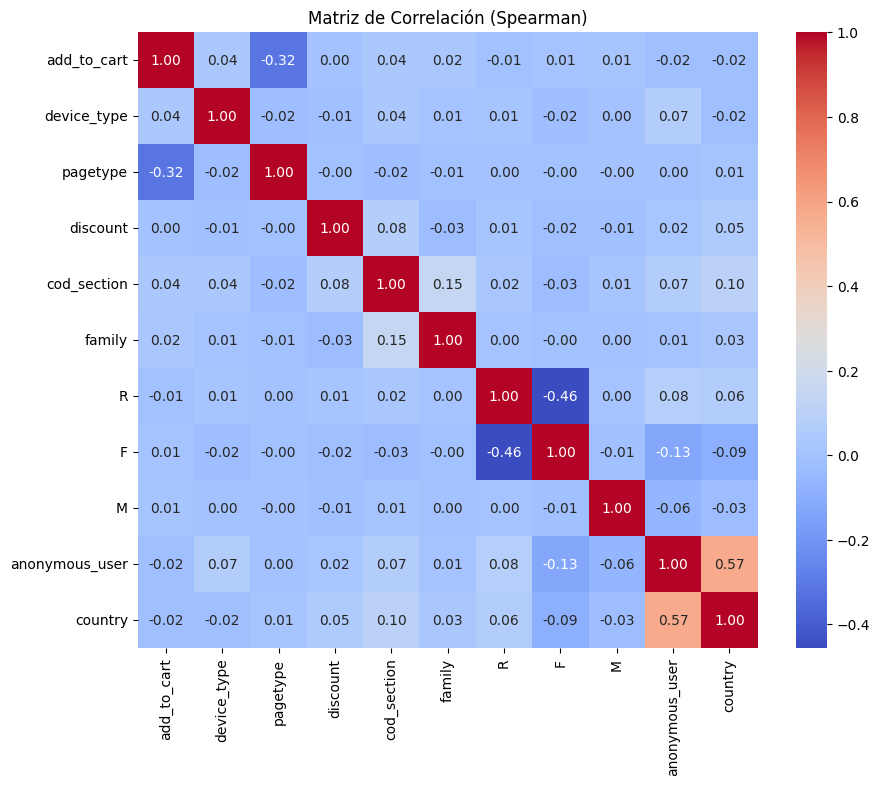

In [58]:
import pandas as pd

# Filtrar columnas numéricas que realmente quieras correlacionar:
cols_numeric = [
    "add_to_cart", "device_type", "pagetype", "discount", 
    "cod_section", "family", "R", "F", "M", 
    "anonymous_user", "country" 
]
df_corr = train_full[cols_numeric]

# Matriz de correlación con método Pearson (o Spearman si lo prefieres):
corr_matrix = df_corr.corr(method='spearman')

# Visualizar correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación (Spearman)")
plt.show()


In [59]:
# Confirmar la longitud de los embeddings directamente
train_embedding_length = train_full["embedding_reduced"].iloc[0].shape[0]
test_embedding_length = test_full["embedding_reduced"].iloc[0].shape[0]

# Mostrar la longitud de los embeddings
print("Dimensión de embeddings (Train):", train_embedding_length)
print("Dimensión de embeddings (Test):", test_embedding_length)


Dimensión de embeddings (Train): 100
Dimensión de embeddings (Test): 100


In [60]:
# Verificar si todos los embeddings tienen la misma longitud
train_lengths = train_full["embedding_reduced"].apply(lambda x: x.shape[0]).unique()
test_lengths = test_full["embedding_reduced"].apply(lambda x: x.shape[0]).unique()

print("Longitudes únicas en Train:", train_lengths)
print("Longitudes únicas en Test:", test_lengths)


Longitudes únicas en Train: [100]
Longitudes únicas en Test: [100]


In [61]:
# Proporción de usuarios anónimos
print("Usuarios anónimos en Train:", train_full["anonymous_user"].mean())
print("Usuarios anónimos en Test:", test_full["anonymous_user"].mean())


Usuarios anónimos en Train: 0.8479320061950427
Usuarios anónimos en Test: 0.7944645331350748


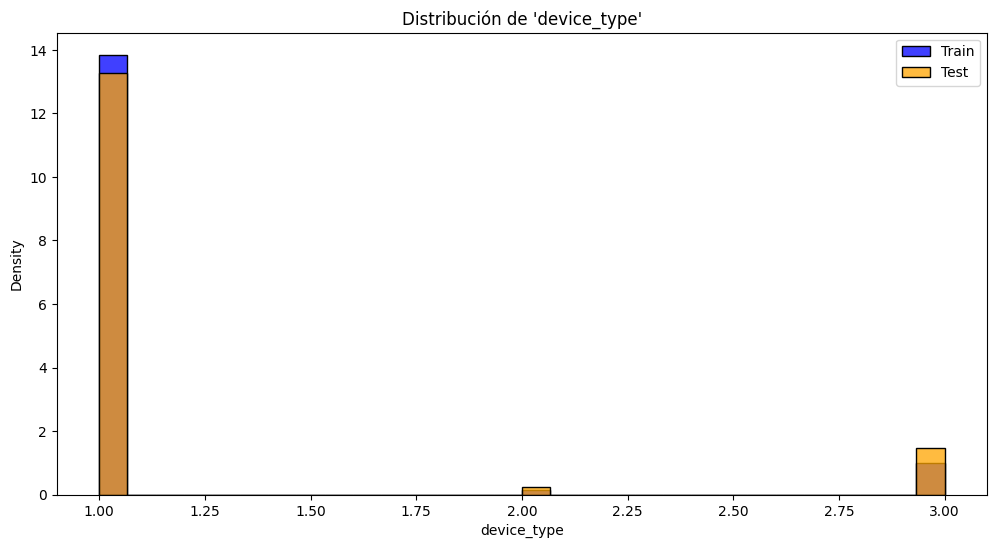

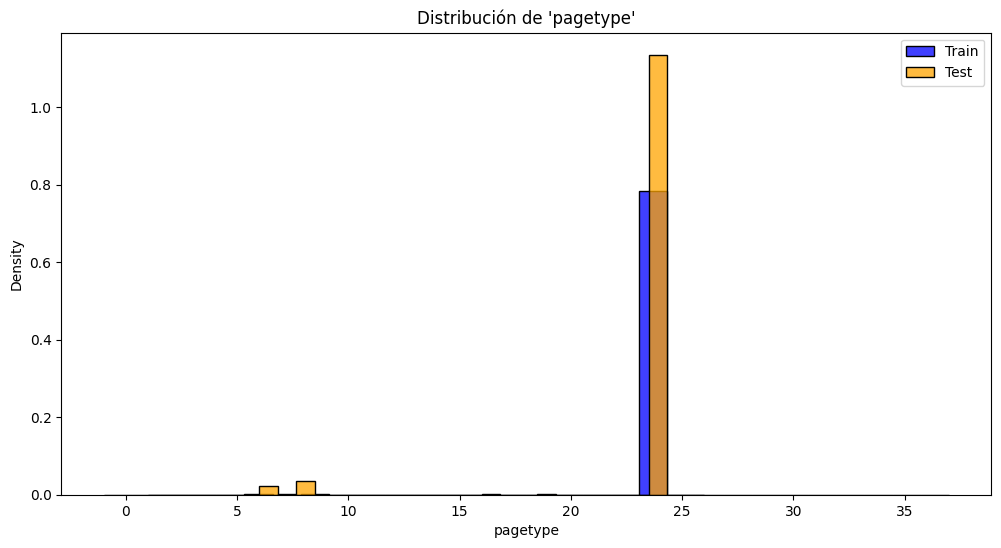

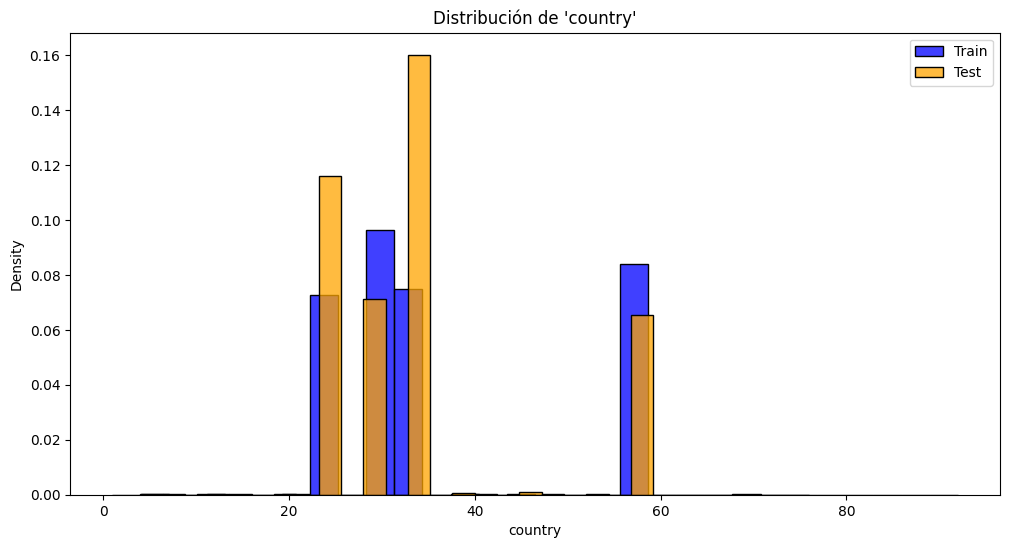

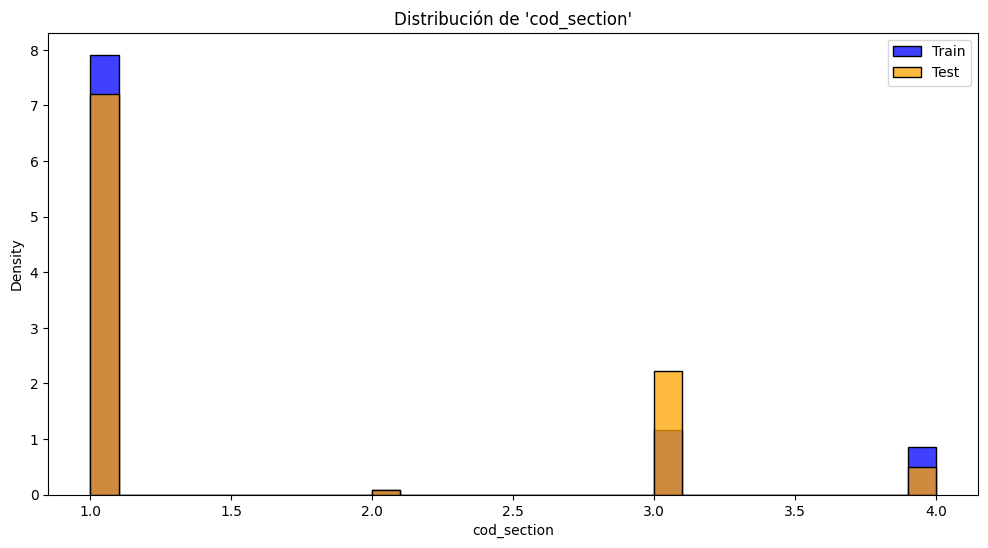

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Función para comparar distribuciones
def compare_distributions(train, test, column, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(train[column], kde=False, color="blue", label="Train", stat="density", bins=30)
    sns.histplot(test[column], kde=False, color="orange", label="Test", stat="density", bins=30)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Comparaciones clave
compare_distributions(train_full, test_full, "device_type", "Distribución de 'device_type'")
compare_distributions(train_full, test_full, "pagetype", "Distribución de 'pagetype'")
compare_distributions(train_full, test_full, "country", "Distribución de 'country'")
compare_distributions(train_full, test_full, "cod_section", "Distribución de 'cod_section'")


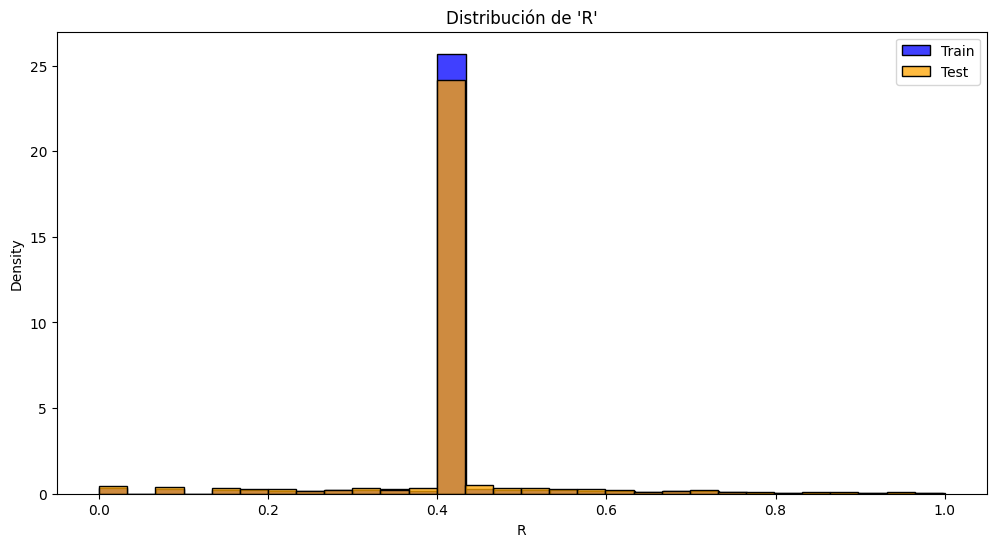

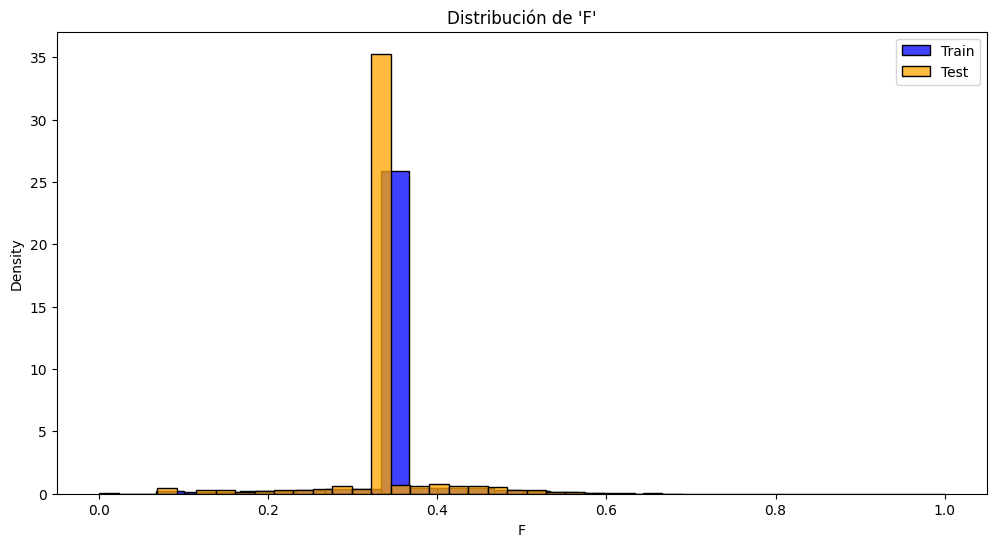

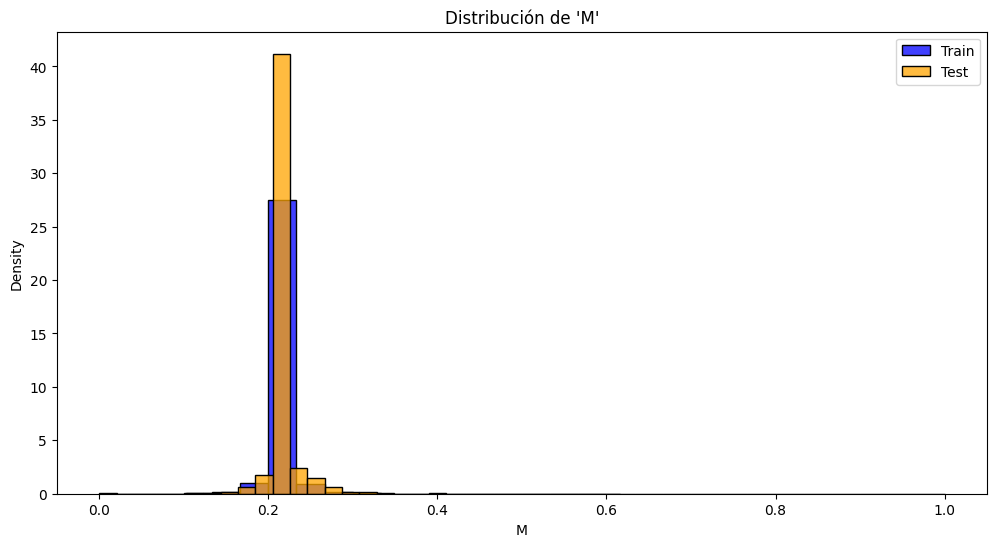

In [63]:
# Comparaciones de variables numéricas
compare_distributions(train_full, test_full, "R", "Distribución de 'R'")
compare_distributions(train_full, test_full, "F", "Distribución de 'F'")
compare_distributions(train_full, test_full, "M", "Distribución de 'M'")


--

# Modelo base

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Seleccionar una muestra (10%)
sample_fraction = 0.3
train_sample = train_full.sample(frac=sample_fraction, random_state=42)

# Verificar balance en la variable objetivo
print("Distribución de 'add_to_cart' en la muestra:")
print(train_sample["add_to_cart"].value_counts(normalize=True))

# Ordenar por fecha y dividir por tiempo (80% para entrenamiento)
train_sample = train_sample.sort_values("date")
split_date = train_sample["date"].quantile(0.8)

train_data = train_sample[train_sample["date"] <= split_date]
val_data = train_sample[train_sample["date"] > split_date]

print(f"Datos de entrenamiento: {len(train_data)} registros")
print(f"Datos de validación: {len(val_data)} registros")

# Variables independientes (features) y objetivo
features = ["pagetype", "device_type", "R", "F", "M", "anonymous_user", "country", "cod_section"]
target = "add_to_cart"

X_train = train_data[features]
y_train = train_data[target]
X_val = val_data[features]
y_val = val_data[target]


NameError: name 'train_full' is not defined

In [ ]:
import lightgbm as lgb

# Parámetros del modelo con soporte GPU
params = {
    "objective": "binary",              # Clasificación binaria
    "metric": "auc",                    # Métrica de evaluación
    "boosting_type": "gbdt",            # Gradient Boosted Decision Trees
    "learning_rate": 0.03,              # Tasa de aprendizaje
    "num_leaves": 31,                   # Número máximo de hojas
    "feature_fraction": 0.8,            # Fracción de características por iteración
    "bagging_fraction": 0.8,            # Fracción de datos por iteración
    "bagging_freq": 5,                  # Frecuencia de bagging
    "device_type": "gpu",               # Activar entrenamiento en GPU
    "verbose": -1,                      # Suprimir logs adicionales
    "is_unbalance": True                # Manejar desbalance de clases
}

# Crear datasets para LightGBM
train_dataset = lgb.Dataset(X_train, label=y_train)
val_dataset = lgb.Dataset(X_val, label=y_val, reference=train_dataset)

# Callbacks: Early Stopping y Monitoreo
callbacks = [
    lgb.early_stopping(stopping_rounds=50, verbose=True),  # Detener después de 50 iteraciones sin mejora
    lgb.log_evaluation(period=50),                        # Monitorear cada 50 iteraciones
]

# Entrenamiento
model = lgb.train(
    params,
    train_dataset,
    valid_sets=[train_dataset, val_dataset],
    num_boost_round=1000,
    callbacks=callbacks
)


In [96]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score, ndcg_score

# Predicciones
y_pred = model.predict(X_val)

# Métrica ROC-AUC
roc_auc = roc_auc_score(y_val, y_pred)
print(f"ROC-AUC en validación: {roc_auc:.4f}")

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_val, y_pred)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# NDCG@5 y NDCG@10
y_true = np.array(y_val)  # Convertir a numpy array
y_scores = np.array(y_pred)

ndcg_at_5 = ndcg_score([y_true], [y_scores], k=5)
ndcg_at_10 = ndcg_score([y_true], [y_scores], k=10)
print(f"NDCG@5 (Revisado): {ndcg_at_5:.4f}")
print(f"NDCG@10 (Revisado): {ndcg_at_10:.4f}")

# F1-Score (Threshold 0.5)
y_pred_binary = (y_pred > 0.5).astype(int)
f1 = f1_score(y_val, y_pred_binary)
print(f"F1-Score (Threshold 0.5): {f1:.4f}")

# Precision@k
def precision_at_k(y_true, y_scores, k):
    """Calcula la precisión en los k primeros elementos."""
    idx = np.argsort(y_scores)[::-1]  # Índices de los scores en orden descendente
    top_k = idx[:k]  # Seleccionar los k primeros
    return np.sum(y_true[top_k]) / k  # Proporción de relevantes en el top_k

precision_5 = precision_at_k(y_true, y_scores, k=5)
precision_10 = precision_at_k(y_true, y_scores, k=10)
print(f"Precision@5 (Revisado): {precision_5:.4f}")
print(f"Precision@10 (Revisado): {precision_10:.4f}")

# F1-Score con Threshold 0.3
y_pred_binary_threshold = (y_pred > 0.3).astype(int)
f1_new = f1_score(y_val, y_pred_binary_threshold)
print(f"F1-Score (Threshold 0.3): {f1_new:.4f}")

print("Cantidad de productos relevantes en la validación:", y_val.sum())


ROC-AUC en validación: 0.6735
Precision-Recall AUC: 0.2452
NDCG@5 (Revisado): 1.0000
NDCG@10 (Revisado): 1.0000
F1-Score (Threshold 0.5): 0.1849
Precision@5 (Revisado): 1.0000
Precision@10 (Revisado): 1.0000
F1-Score (Threshold 0.3): 0.1165
Cantidad de productos relevantes en la validación: 164881


# Feature importance

In [97]:
# Reducir el tamaño del dataset para análisis rápido
train_subset = train_data.sample(frac=0.1, random_state=42)
val_subset = val_data.sample(frac=0.1, random_state=42)

# Verificar tamaños
print(f"Tamaño del subset de entrenamiento: {len(train_subset)}")
print(f"Tamaño del subset de validación: {len(val_subset)}")

# Features y target
X_train_subset = train_subset[features]
y_train_subset = train_subset[target]
X_val_subset = val_subset[features]
y_val_subset = val_subset[target]


Tamaño del subset de entrenamiento: 1133062
Tamaño del subset de validación: 271345


In [98]:
# Crear datasets para LightGBM
train_dataset_subset = lgb.Dataset(X_train_subset, label=y_train_subset)
val_dataset_subset = lgb.Dataset(X_val_subset, label=y_val_subset, reference=train_dataset_subset)

# Entrenar con la muestra pequeña
model_subset = lgb.train(
    params,
    train_dataset_subset,
    valid_sets=[train_dataset_subset, val_dataset_subset],
    num_boost_round=500,
    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=True)],
)


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[35]	training's auc: 0.672188	valid_1's auc: 0.673538


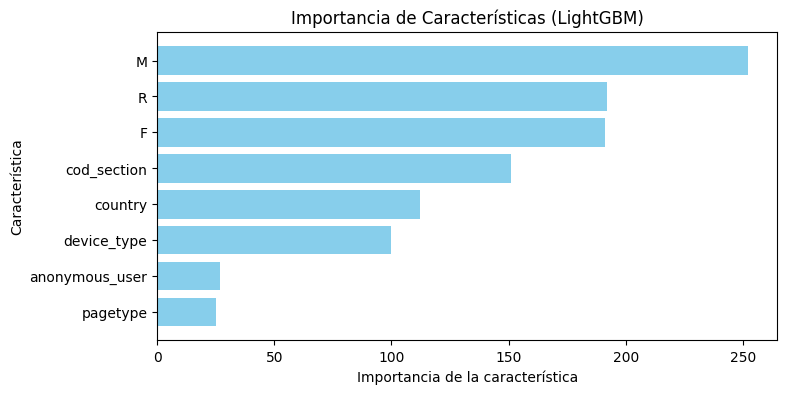

          Feature  Importance
4               M         252
2               R         192
3               F         191
7     cod_section         151
6         country         112
1     device_type         100
5  anonymous_user          27
0        pagetype          25


In [100]:
import matplotlib.pyplot as plt

# Obtener importancia de características
feature_importance = model_subset.feature_importance()
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Graficar
plt.figure(figsize=(8, 4))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importancia de la característica")
plt.ylabel("Característica")
plt.title("Importancia de Características (LightGBM)")
plt.gca().invert_yaxis()  # Invertir el eje para mejor visualización
plt.show()

print(importance_df)


# Reentrenamiento sin pagetype y anonymous_user --> Peor resultado.

# Reentreno incluyendo variables explucidas + scale_pos_weight (16.07) -> Sin mejoras

In [104]:
# Restaurar las características eliminadas
features_original = ["pagetype", "device_type", "R", "F", "M", "anonymous_user", "country", "cod_section"]

X_train_full = X_train[features_original]
X_val_full = X_val[features_original]


In [105]:
# Calcular scale_pos_weight
class_0 = len(y_train[y_train == 0])
class_1 = len(y_train[y_train == 1])
scale_pos_weight = class_0 / class_1

print(f"scale_pos_weight: {scale_pos_weight:.2f}")

# Actualizar parámetros del modelo
params["scale_pos_weight"] = scale_pos_weight
params.pop("is_unbalance", None)  # Remover is_unbalance para evitar conflicto


scale_pos_weight: 16.07


True

In [106]:
# Crear datasets para LightGBM
train_dataset_full = lgb.Dataset(X_train_full, label=y_train)
val_dataset_full = lgb.Dataset(X_val_full, label=y_val, reference=train_dataset_full)

# Entrenar el modelo
model_full = lgb.train(
    params,
    train_dataset_full,
    valid_sets=[train_dataset_full, val_dataset_full],
    num_boost_round=500,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50, verbose=True),  # Early Stopping
        lgb.log_evaluation(period=50)                         # Monitoreo
    ]
)


Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.670684	valid_1's auc: 0.673369
[100]	training's auc: 0.670925	valid_1's auc: 0.67339
Early stopping, best iteration is:
[80]	training's auc: 0.670828	valid_1's auc: 0.67347


In [107]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, ndcg_score, f1_score

# Predicciones
y_pred_full = model_full.predict(X_val_full)

# ROC-AUC
roc_auc_full = roc_auc_score(y_val, y_pred_full)
print(f"ROC-AUC en validación: {roc_auc_full:.4f}")

# Precision-Recall AUC
precision_full, recall_full, _ = precision_recall_curve(y_val, y_pred_full)
pr_auc_full = auc(recall_full, precision_full)
print(f"Precision-Recall AUC: {pr_auc_full:.4f}")

# NDCG@5 y NDCG@10
y_scores_full = np.array(y_pred_full)
ndcg_at_5_full = ndcg_score([y_val], [y_scores_full], k=5)
ndcg_at_10_full = ndcg_score([y_val], [y_scores_full], k=10)
print(f"NDCG@5: {ndcg_at_5_full:.4f}")
print(f"NDCG@10: {ndcg_at_10_full:.4f}")

# F1-Score (Threshold 0.5)
y_pred_binary_full = (y_pred_full > 0.5).astype(int)
f1_full = f1_score(y_val, y_pred_binary_full)
print(f"F1-Score (Threshold 0.5): {f1_full:.4f}")


ROC-AUC en validación: 0.6735
Precision-Recall AUC: 0.2451
NDCG@5: 1.0000
NDCG@10: 1.0000
F1-Score (Threshold 0.5): 0.1850


# Cambio de params

## DART

In [69]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score, average_precision_score
from sklearn.preprocessing import MinMaxScaler

# Seleccionar una muestra (30%) del dataset completo
sample_fraction = 0.1
train_sample = train_full.sample(frac=sample_fraction, random_state=42)

# Verificar balance en la variable objetivo
print("Distribución de 'add_to_cart' en la muestra:")
print(train_sample["add_to_cart"].value_counts(normalize=True))

# Ordenar por fecha y dividir por tiempo (80% para entrenamiento)
train_sample = train_sample.sort_values("date")
split_date = train_sample["date"].quantile(0.8)

train_data = train_sample[train_sample["date"] <= split_date]
val_data = train_sample[train_sample["date"] > split_date]

print(f"Datos de entrenamiento: {len(train_data)} registros")
print(f"Datos de validación: {len(val_data)} registros")

# Calcular duración de la sesión utilizando `assign` para evitar el warning
train_data = train_data.assign(
    session_duration=train_data.groupby("session_id")["timestamp_local"]
    .transform(lambda x: (x.max() - x.min()).total_seconds())
)

val_data = val_data.assign(
    session_duration=val_data.groupby("session_id")["timestamp_local"]
    .transform(lambda x: (x.max() - x.min()).total_seconds())
)

# Calcular popularidad del producto
product_popularity = train_data["partnumber"].value_counts(normalize=True)

train_data = train_data.assign(
    product_popularity=train_data["partnumber"].map(product_popularity)
)

val_data = val_data.assign(
    product_popularity=val_data["partnumber"].map(product_popularity).fillna(0)
)

# Filtrar grupos con al menos dos filas
valid_sessions_train = train_data["session_id"].value_counts()
valid_sessions_train = valid_sessions_train[valid_sessions_train >= 2].index
train_data = train_data[train_data["session_id"].isin(valid_sessions_train)]

valid_sessions_val = val_data["session_id"].value_counts()
valid_sessions_val = valid_sessions_val[valid_sessions_val >= 2].index
val_data = val_data[val_data["session_id"].isin(valid_sessions_val)]

# Variables independientes (features) y objetivo
features = ["pagetype", "device_type", "R", "F", "M", "anonymous_user", "country", "cod_section", "session_duration", "product_popularity"]
target = "add_to_cart"

X_train = train_data[features]
y_train = train_data[target]
X_val = val_data[features]
y_val = val_data[target]

# Crear grupos por sesión
group_train = train_data.groupby("session_id").size().tolist()
group_val = val_data.groupby("session_id").size().tolist()

# Calcular scale_pos_weight
class_0 = len(y_train[y_train == 0])
class_1 = len(y_train[y_train == 1])
scale_pos_weight = class_0 / class_1
print(f"scale_pos_weight (Ajustado): {scale_pos_weight * 1.2:.2f}")

# Parámetros del modelo con LambdaRank
params = {
    "objective": "lambdarank",         # Optimizar rankings directamente
    "metric": "ndcg",                 # Métrica orientada a ranking
    "boosting_type": "dart",          # Usar DART para mayor variabilidad
    "learning_rate": 0.03,            # Tasa de aprendizaje
    "num_leaves": 511,                # Mayor capacidad del modelo
    "max_bin": 255,                   # Mayor granularidad en los splits
    "min_data_in_leaf": 5,            # Mejor manejo de clases minoritarias
    "max_depth": -1,                  # Sin límite de profundidad
    "feature_fraction": 0.8,          # Fracción de características por iteración
    "bagging_fraction": 0.8,          # Fracción de datos por iteración
    "bagging_freq": 5,                # Frecuencia de bagging
    "device_type": "gpu",             # Entrenamiento en GPU
    "drop_rate": 0.1,                 # Proporción de árboles descartados
    "max_drop": 50,                   # Máximo de árboles descartados
    "skip_drop": 0.1,                 # Reducir iteraciones sin dropout
    "label_gain": [0, 1],             # Ganancia para las etiquetas (0 para negativos, 1 para positivos)
    "verbose": -1                     # Suprimir logs adicionales
}

# Crear datasets para LightGBM
train_dataset = lgb.Dataset(X_train, label=y_train, group=group_train)
val_dataset = lgb.Dataset(X_val, label=y_val, group=group_val, reference=train_dataset)

# Entrenar el modelo con LambdaRank
model = lgb.train(
    params,
    train_dataset,
    valid_sets=[train_dataset, val_dataset],
    num_boost_round=500,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50, verbose=True),
        lgb.log_evaluation(period=50)
    ]
)

# Predicciones
y_pred = model.predict(X_val)

# Normalizar probabilidades
scaler = MinMaxScaler()
y_scores_normalized = scaler.fit_transform(y_pred.reshape(-1, 1)).flatten()

# Evaluación de métricas
print("\n--- Evaluación de Métricas ---")
roc_auc = roc_auc_score(y_val, y_scores_normalized)
print(f"ROC-AUC en validación: {roc_auc:.4f}")

precision, recall, _ = precision_recall_curve(y_val, y_scores_normalized)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# MAP
average_precision = average_precision_score(y_val, y_scores_normalized)
print(f"MAP (Mean Average Precision): {average_precision:.4f}")

# Calcular NDCG
def calculate_ndcg(y_true, y_scores, k):
    """
    Calcular NDCG@k con una implementación alternativa.
    """
    order = np.argsort(y_scores)[::-1]
    y_true_sorted = np.take(y_true, order[:k])

    dcg = np.sum(y_true_sorted / np.log2(np.arange(2, len(y_true_sorted) + 2)))
    y_true_sorted_ideal = np.sort(y_true)[::-1][:k]
    idcg = np.sum(y_true_sorted_ideal / np.log2(np.arange(2, len(y_true_sorted_ideal) + 2)))
    return dcg / idcg if idcg > 0 else 0.0

ndcg_at_5_alt = calculate_ndcg(y_val.values, y_scores_normalized, k=5)
ndcg_at_10_alt = calculate_ndcg(y_val.values, y_scores_normalized, k=10)
print(f"NDCG@5 (Ajustado): {ndcg_at_5_alt:.4f}")
print(f"NDCG@10 (Ajustado): {ndcg_at_10_alt:.4f}")

# Ajuste de Threshold para F1-Score
print("\n--- Ajuste de Threshold para F1-Score ---")
thresholds = np.linspace(0.1, 0.9, 9)
best_f1 = 0
best_threshold = 0.5

for t in thresholds:
    y_pred_binary = (y_scores_normalized > t).astype(int)
    f1 = f1_score(y_val, y_pred_binary)
    print(f"Threshold: {t:.1f}, F1-Score: {f1:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"\nMejor F1-Score: {best_f1:.4f} con Threshold: {best_threshold}")


Distribución de 'add_to_cart' en la muestra:
add_to_cart
0    0.941009
1    0.058991
Name: proportion, dtype: float64
Datos de entrenamiento: 3777512 registros
Datos de validación: 903844 registros
scale_pos_weight (Ajustado): 19.84


/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/.env/lib/python3.10/site-packages/lightgbm/callback.py:333: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[50]	training's ndcg@1: 0.908935	training's ndcg@2: 0.929746	training's ndcg@3: 0.939579	training's ndcg@4: 0.944574	training's ndcg@5: 0.947489	valid_1's ndcg@1: 0.89964	valid_1's ndcg@2: 0.922993	valid_1's ndcg@3: 0.933824	valid_1's ndcg@4: 0.939366	valid_1's ndcg@5: 0.942622
[100]	training's ndcg@1: 0.909904	training's ndcg@2: 0.930546	training's ndcg@3: 0.940184	training's ndcg@4: 0.945169	training's ndcg@5: 0.948068	valid_1's ndcg@1: 0.899774	valid_1's ndcg@2: 0.923024	valid_1's ndcg@3: 0.93392	valid_1's ndcg@4: 0.939464	valid_1's ndcg@5: 0.942694
[150]	training's ndcg@1: 0.910043	training's ndcg@2: 0.930655	training's ndcg@3: 0.940335	training's ndcg@4: 0.945265	training's ndcg@5: 0.948128	valid_1's ndcg@1: 0.899984	valid_1's ndcg@2: 0.923025	valid_1's ndcg@3: 0.933953	valid_1's ndcg@4: 0.939531	valid_1's ndcg@5: 0.942719
[200]	training's ndcg@1: 0.910862	training's ndcg@2: 0.931253	training's ndcg@3: 0.940857	training's ndcg@4: 0.945747	training's ndcg@5: 0.948577	valid_1's ndcg

## GBDT

In [84]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score, average_precision_score
from sklearn.preprocessing import MinMaxScaler

# Seleccionar una muestra (10%) del dataset completo
sample_fraction = 0.3
train_sample = train_full.sample(frac=sample_fraction, random_state=42)

# Verificar balance en la variable objetivo
print("Distribución de 'add_to_cart' en la muestra:")
print(train_sample["add_to_cart"].value_counts(normalize=True))

# Ordenar por fecha y dividir por tiempo (80% para entrenamiento)
train_sample = train_sample.sort_values("date")
split_date = train_sample["date"].quantile(0.8)

train_data = train_sample[train_sample["date"] <= split_date]
val_data = train_sample[train_sample["date"] > split_date]

print(f"Datos de entrenamiento: {len(train_data)} registros")
print(f"Datos de validación: {len(val_data)} registros")

# Calcular duración de la sesión utilizando assign para evitar el warning
train_data = train_data.assign(
    session_duration=train_data.groupby("session_id")["timestamp_local"]
    .transform(lambda x: (x.max() - x.min()).total_seconds())
)
val_data = val_data.assign(
    session_duration=val_data.groupby("session_id")["timestamp_local"]
    .transform(lambda x: (x.max() - x.min()).total_seconds())
)

# Calcular popularidad del producto
product_popularity = train_data["partnumber"].value_counts(normalize=True)
train_data = train_data.assign(
    product_popularity=train_data["partnumber"].map(product_popularity)
)
val_data = val_data.assign(
    product_popularity=val_data["partnumber"].map(product_popularity).fillna(0)
)

# Filtrar grupos con al menos dos filas
valid_sessions_train = train_data["session_id"].value_counts()
valid_sessions_train = valid_sessions_train[valid_sessions_train >= 2].index
train_data = train_data[train_data["session_id"].isin(valid_sessions_train)]

valid_sessions_val = val_data["session_id"].value_counts()
valid_sessions_val = valid_sessions_val[valid_sessions_val >= 2].index
val_data = val_data[val_data["session_id"].isin(valid_sessions_val)]

# Variables independientes (features) y objetivo
features = [
    "pagetype", "device_type", "R", "F", "M", "anonymous_user", "country",
    "cod_section", "session_duration", "product_popularity"
]
target = "add_to_cart"

X_train = train_data[features]
y_train = train_data[target]
X_val = val_data[features]
y_val = val_data[target]

# Crear grupos por sesión
group_train = train_data.groupby("session_id").size().tolist()
group_val = val_data.groupby("session_id").size().tolist()

# Calcular scale_pos_weight
class_0 = len(y_train[y_train == 0])
class_1 = len(y_train[y_train == 1])
scale_pos_weight = class_0 / class_1
print(f"scale_pos_weight (Ajustado): {scale_pos_weight * 1.2:.2f}")



Distribución de 'add_to_cart' en la muestra:
add_to_cart
0    0.941
1    0.059
Name: proportion, dtype: float64
Datos de entrenamiento: 11330619 registros
Datos de validación: 2713449 registros
scale_pos_weight (Ajustado): 19.44


In [85]:
# Parámetros del modelo con LambdaRank y ajustes propuestos
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score, average_precision_score

# Configuración de parámetros ajustados
params = {
    "objective": "lambdarank",
    "metric": ["ndcg", "map", "auc"],
    "boosting_type": "gbdt",
    "learning_rate": 0.03,
    "num_leaves": 511,
    "max_bin": 255,
    "min_data_in_leaf": 100,  # Aumentar para mayor regularización
    "min_gain_to_split": 0.1,  # Evitar divisiones insignificantes
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "pos_bagging_fraction": 0.6,  # Ajustado para clases positivas
    "neg_bagging_fraction": 0.4,  # Ajustado para clases negativas
    "lambda_l1": 1.0,  # Regularización L1
    "lambda_l2": 1.0,  # Regularización L2
    "path_smooth": 0.1,  # Penalización acumulativa
    "device_type": "gpu",  # Asegurarse de usar CUDA
    "num_gpu": 1,
    "use_quantized_grad": True,  # Activar cuantización
    "lambdarank_position_bias_regularization": 0.5,  # Reducir sesgo posicional
    "label_gain": [0, 1],  # Ganancia para clases
    "verbose": -1
}

# Crear datasets
train_dataset = lgb.Dataset(X_train, label=y_train, group=group_train)
val_dataset = lgb.Dataset(X_val, label=y_val, group=group_val, reference=train_dataset)

# Entrenamiento del modelo
model = lgb.train(
    params,
    train_dataset,
    valid_sets=[train_dataset, val_dataset],
    num_boost_round=500,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50, verbose=True),
        lgb.log_evaluation(period=50)
    ]
)

# Predicciones
y_pred = model.predict(X_val)

# Normalización y métricas
y_scores_normalized = (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())

print("\n--- Evaluación de Métricas ---")
roc_auc = roc_auc_score(y_val, y_scores_normalized)
print(f"ROC-AUC en validación: {roc_auc:.4f}")

precision, recall, _ = precision_recall_curve(y_val, y_scores_normalized)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

average_precision = average_precision_score(y_val, y_scores_normalized)
print(f"MAP (Mean Average Precision): {average_precision:.4f}")

# NDCG y métricas personalizadas
print("\n--- NDCG y Métricas Adicionales ---")
ndcg_scores = {f"NDCG@{k}": calculate_ndcg(y_val.values, y_scores_normalized, k) for k in [5, 10]}
for k, score in ndcg_scores.items():
    print(f"{k}: {score:.4f}")

# Ajuste de Threshold
print("\n--- Ajuste de Threshold para F1-Score ---")
best_f1, best_threshold = 0, 0
for t in np.linspace(0.1, 0.9, 9):
    f1 = f1_score(y_val, (y_scores_normalized > t).astype(int))
    print(f"Threshold: {t:.1f}, F1-Score: {f1:.4f}")
    if f1 > best_f1:
        best_f1, best_threshold = f1, t

print(f"\nMejor F1-Score: {best_f1:.4f} con Threshold: {best_threshold}")


Training until validation scores don't improve for 50 rounds
[50]	training's ndcg@1: 0.850035	training's ndcg@2: 0.869295	training's ndcg@3: 0.882399	training's ndcg@4: 0.890763	training's ndcg@5: 0.896408	training's map@1: 0.850035	training's map@2: 0.859876	training's map@3: 0.867964	training's map@4: 0.872953	training's map@5: 0.876121	training's auc: 0.695172	valid_1's ndcg@1: 0.845274	valid_1's ndcg@2: 0.865982	valid_1's ndcg@3: 0.88002	valid_1's ndcg@4: 0.888672	valid_1's ndcg@5: 0.894425	valid_1's map@1: 0.845274	valid_1's map@2: 0.856336	valid_1's map@3: 0.865097	valid_1's map@4: 0.87024	valid_1's map@5: 0.873461	valid_1's auc: 0.684705
Early stopping, best iteration is:
[5]	training's ndcg@1: 0.845057	training's ndcg@2: 0.864984	training's ndcg@3: 0.878551	training's ndcg@4: 0.887252	training's ndcg@5: 0.893086	training's map@1: 0.845057	training's map@2: 0.855497	training's map@3: 0.863902	training's map@4: 0.86908	training's map@5: 0.872353	training's auc: 0.687874	valid_1's

---

## model_2


In [90]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import (
    roc_auc_score, precision_recall_curve, auc, f1_score, average_precision_score
)
from sklearn.preprocessing import MinMaxScaler

# Seleccionar una muestra (10%) del dataset completo
sample_fraction = 0.1
train_sample = train_full.sample(frac=sample_fraction, random_state=42)

# Verificar balance en la variable objetivo
print("Distribución de 'add_to_cart' en la muestra:")
print(train_sample["add_to_cart"].value_counts(normalize=True))

# Ordenar por fecha y dividir por tiempo (80% para entrenamiento)
train_sample = train_sample.sort_values("date")
split_date = train_sample["date"].quantile(0.8)

train_data = train_sample[train_sample["date"] <= split_date]
val_data = train_sample[train_sample["date"] > split_date]

print(f"Datos de entrenamiento: {len(train_data)} registros")
print(f"Datos de validación: {len(val_data)} registros")

# Calcular duración de la sesión
train_data["session_duration"] = (
    train_data.groupby("session_id")["timestamp_local"]
    .transform(lambda x: (x.max() - x.min()).total_seconds())
)
val_data["session_duration"] = (
    val_data.groupby("session_id")["timestamp_local"]
    .transform(lambda x: (x.max() - x.min()).total_seconds())
)

# Calcular popularidad del producto
product_popularity = train_data["partnumber"].value_counts(normalize=True)
train_data["product_popularity"] = train_data["partnumber"].map(product_popularity)
val_data["product_popularity"] = val_data["partnumber"].map(product_popularity).fillna(0)

# Crear características derivadas
train_data["RFM_score"] = train_data["R"] * train_data["F"] * train_data["M"]
val_data["RFM_score"] = val_data["R"] * val_data["F"] * val_data["M"]

train_data["interaction_section_country"] = train_data["cod_section"].astype(str) + "_" + train_data["country"].astype(str)
val_data["interaction_section_country"] = val_data["cod_section"].astype(str) + "_" + val_data["country"].astype(str)

# Codificación de la interacción
interaction_mapping = {v: k for k, v in enumerate(train_data["interaction_section_country"].unique())}
train_data["interaction_section_country_encoded"] = train_data["interaction_section_country"].map(interaction_mapping)
val_data["interaction_section_country_encoded"] = val_data["interaction_section_country"].map(interaction_mapping).fillna(-1)

# Filtrar sesiones con al menos dos filas
train_data = train_data[train_data["session_id"].isin(
    train_data["session_id"].value_counts()[lambda x: x >= 2].index
)]
val_data = val_data[val_data["session_id"].isin(
    val_data["session_id"].value_counts()[lambda x: x >= 2].index
)]

# Variables independientes (features) y objetivo
features = ["pagetype", "device_type", "R", "F", "M", "anonymous_user", "country",
            "cod_section", "session_duration", "product_popularity", "RFM_score",
            "interaction_section_country_encoded"]
target = "add_to_cart"

X_train = train_data[features]
y_train = train_data[target]
X_val = val_data[features]
y_val = val_data[target]

# Grupos por sesión
group_train = train_data.groupby("session_id").size().tolist()
group_val = val_data.groupby("session_id").size().tolist()

# Calcular scale_pos_weight
class_0 = len(y_train[y_train == 0])
class_1 = len(y_train[y_train == 1])
scale_pos_weight = class_0 / class_1
print(f"scale_pos_weight (Ajustado): {scale_pos_weight:.2f}")

# Parámetros del modelo optimizados
params = {
    "objective": "lambdarank",
    "metric": ["ndcg", "map", "auc", "binary_logloss"],  # Métricas adicionales
    "boosting_type": "gbdt",
    "learning_rate": 0.02,
    "num_leaves": 63,
    "max_depth": 7,
    "min_data_in_leaf": 200,
    "min_sum_hessian_in_leaf": 1e-2,
    "feature_fraction": 0.6,  # Reducido para aumentar la variabilidad
    "bagging_fraction": 0.7,
    "bagging_freq": 5,
    "lambda_l1": 2.0,
    "lambda_l2": 2.0,
    "path_smooth": 2.0,
    "drop_rate": 0.1,
    "max_drop": 50,
    "pos_bagging_fraction": 0.8,  # Aumentado para mayor representación de positivos
    "device_type": "gpu",
    "monotone_constraints": [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],  # R, F, M con relación positiva
    "scale_pos_weight": scale_pos_weight,
    "verbosity": -1
}

# Crear datasets para LightGBM
train_dataset = lgb.Dataset(X_train, label=y_train, group=group_train)
val_dataset = lgb.Dataset(X_val, label=y_val, group=group_val, reference=train_dataset)

# Entrenar el modelo
model_2 = lgb.train(
    params,
    train_dataset,
    valid_sets=[train_dataset, val_dataset],
    num_boost_round=500,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50, verbose=True),
        lgb.log_evaluation(period=50)
    ]
)

# Predicciones
y_pred = model_2.predict(X_val)

# Normalizar probabilidades
scaler = MinMaxScaler()
y_scores_normalized = scaler.fit_transform(y_pred.reshape(-1, 1)).flatten()

# Evaluación de métricas
print("\n--- Evaluación de Métricas ---")
roc_auc = roc_auc_score(y_val, y_scores_normalized)
print(f"ROC-AUC en validación: {roc_auc:.4f}")

precision, recall, _ = precision_recall_curve(y_val, y_scores_normalized)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

average_precision = average_precision_score(y_val, y_scores_normalized)
print(f"MAP (Mean Average Precision): {average_precision:.4f}")

# Threshold para F1-Score
print("\n--- Ajuste de Threshold para F1-Score ---")
thresholds = np.linspace(0.1, 0.9, 9)
best_f1 = 0
best_threshold = 0.5

for t in thresholds:
    y_pred_binary = (y_scores_normalized > t).astype(int)
    f1 = f1_score(y_val, y_pred_binary)
    print(f"Threshold: {t:.1f}, F1-Score: {f1:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"\nMejor F1-Score: {best_f1:.4f} con Threshold: {best_threshold}")


Distribución de 'add_to_cart' en la muestra:
add_to_cart
0    0.941009
1    0.058991
Name: proportion, dtype: float64
Datos de entrenamiento: 3777512 registros
Datos de validación: 903844 registros


/tmp/ipykernel_1438/2535262755.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["session_duration"] = (
/tmp/ipykernel_1438/2535262755.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data["session_duration"] = (
/tmp/ipykernel_1438/2535262755.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

scale_pos_weight (Ajustado): 16.54
Training until validation scores don't improve for 50 rounds
[50]	training's ndcg@1: 0.900364	training's ndcg@2: 0.923319	training's ndcg@3: 0.933949	training's ndcg@4: 0.939438	training's ndcg@5: 0.942606	training's map@1: 0.900364	training's map@2: 0.916346	training's map@3: 0.923527	training's map@4: 0.926927	training's map@5: 0.928733	training's auc: 0.681978	training's binary_logloss: 0.928898	valid_1's ndcg@1: 0.90027	valid_1's ndcg@2: 0.923376	valid_1's ndcg@3: 0.934283	valid_1's ndcg@4: 0.939823	valid_1's ndcg@5: 0.942911	valid_1's map@1: 0.90027	valid_1's map@2: 0.91634	valid_1's map@3: 0.9237	valid_1's map@4: 0.927132	valid_1's map@5: 0.92891	valid_1's auc: 0.682444	valid_1's binary_logloss: 0.996509
Early stopping, best iteration is:
[35]	training's ndcg@1: 0.900351	training's ndcg@2: 0.923237	training's ndcg@3: 0.933862	training's ndcg@4: 0.939408	training's ndcg@5: 0.942569	training's map@1: 0.900351	training's map@2: 0.916283	training's 

---

## model_3 - Aprovechamiento de variables categóricas.

Distribución de 'add_to_cart' en la muestra:
add_to_cart
0    0.941009
1    0.058991
Name: proportion, dtype: float64
Datos de entrenamiento: 3777512 registros
Datos de validación: 903844 registros
Aplicando Tomek Links para balancear las clases...
scale_pos_weight (Ajustado): 16.08
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.681296	training's binary_logloss: 0.317492	valid_1's auc: 0.679909	valid_1's binary_logloss: 0.317977
Early stopping, best iteration is:
[3]	training's auc: 0.670315	training's binary_logloss: 0.225941	valid_1's auc: 0.666807	valid_1's binary_logloss: 0.228479


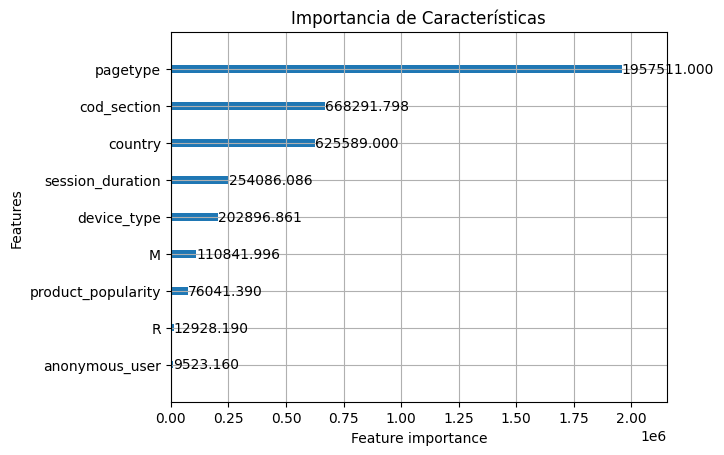

In [191]:
from imblearn.under_sampling import TomekLinks
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar una muestra (10%) del dataset completo
sample_fraction = 0.1
train_sample = train_full.sample(frac=sample_fraction, random_state=42)

# Verificar balance en la variable objetivo
print("Distribución de 'add_to_cart' en la muestra:")
print(train_sample["add_to_cart"].value_counts(normalize=True))

# Ordenar por fecha y dividir por tiempo (80% para entrenamiento)
train_sample = train_sample.sort_values("date")
split_date = train_sample["date"].quantile(0.8)

train_data = train_sample.loc[train_sample["date"] <= split_date].copy()
val_data = train_sample.loc[train_sample["date"] > split_date].copy()

print(f"Datos de entrenamiento: {len(train_data)} registros")
print(f"Datos de validación: {len(val_data)} registros")

# Calcular duración de la sesión
train_data["session_duration"] = (
    train_data.groupby("session_id")["timestamp_local"]
    .transform(lambda x: (x.max() - x.min()).total_seconds())
)
val_data["session_duration"] = (
    val_data.groupby("session_id")["timestamp_local"]
    .transform(lambda x: (x.max() - x.min()).total_seconds())
)

# Calcular popularidad del producto
product_popularity = train_data["partnumber"].value_counts(normalize=True)
train_data["product_popularity"] = train_data["partnumber"].map(product_popularity)
val_data["product_popularity"] = val_data["partnumber"].map(product_popularity).fillna(0)

# Crear características derivadas
train_data["RFM_score"] = train_data["R"] * train_data["F"] * train_data["M"]
val_data["RFM_score"] = val_data["R"] * val_data["F"] * val_data["M"]

# Variables categóricas
categorical_features = ["pagetype", "device_type", "anonymous_user", "country", "cod_section"]

# Convertir variables categóricas a tipo `category`
for col in categorical_features:
    train_data[col] = train_data[col].astype("category")
    val_data[col] = val_data[col].astype("category")

# Variables independientes (features) y objetivo
features = ["pagetype", "device_type", "R", "F", "M", "anonymous_user", "country",
            "cod_section", "session_duration", "product_popularity", "RFM_score"]
target = "add_to_cart"

X_train = train_data[features]
y_train = train_data[target]
X_val = val_data[features]
y_val = val_data[target]

# Usar Tomek Links para eliminar ruido
print("Aplicando Tomek Links para balancear las clases...")
tomek = TomekLinks()
X_train_resampled, y_train_resampled = tomek.fit_resample(X_train, y_train)

# Calcular scale_pos_weight
class_0 = len(y_train[y_train == 0])
class_1 = len(y_train[y_train == 1])
scale_pos_weight = class_0 / class_1
print(f"scale_pos_weight (Ajustado): {scale_pos_weight:.2f}")

# Parámetros del modelo optimizados
params = {
    "objective": "binary",
    "metric": ["auc", "binary_logloss"],
    "boosting_type": "gbdt",
    "learning_rate": 0.01,  # Reducir la tasa de aprendizaje
    "num_leaves": 31,
    "max_depth": 6,
    "min_data_in_leaf": 100,
    "feature_fraction": 0.6,
    "bagging_fraction": 0.7,
    "bagging_freq": 5,
    "lambda_l1": 1.0,
    "lambda_l2": 1.0,
    "scale_pos_weight": scale_pos_weight,
    "device_type": "gpu",
    "verbosity": -1
}

# Crear datasets para LightGBM
train_dataset = lgb.Dataset(X_train_resampled, label=y_train_resampled, categorical_feature=categorical_features)
val_dataset = lgb.Dataset(X_val, label=y_val, categorical_feature=categorical_features)

# Entrenar el modelo
model_3 = lgb.train(
    params,
    train_dataset,
    valid_sets=[train_dataset, val_dataset],
    num_boost_round=500,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50, verbose=True),
        lgb.log_evaluation(period=50)
    ]
)

# Predicciones y evaluación
y_pred = model_3.predict(X_val)
scaler = MinMaxScaler()
y_scores_normalized = scaler.fit_transform(y_pred.reshape(-1, 1)).flatten()

# Análisis de importancia de características
lgb.plot_importance(model_3, max_num_features=10, importance_type="gain")
plt.title("Importancia de Características")
plt.show()


---

Distribución de 'add_to_cart' en el dataset de muestra:
add_to_cart
0    0.941
1    0.059
Name: proportion, dtype: float64
Training until validation scores don't improve for 50 rounds
[50]	training's ndcg@5: 0.891972	training's ndcg@10: 0.904553	valid_1's ndcg@5: 0.891902	valid_1's ndcg@10: 0.904529
[100]	training's ndcg@5: 0.892279	training's ndcg@10: 0.904832	valid_1's ndcg@5: 0.891977	valid_1's ndcg@10: 0.904598
[150]	training's ndcg@5: 0.892541	training's ndcg@10: 0.905085	valid_1's ndcg@5: 0.891908	valid_1's ndcg@10: 0.904583
Early stopping, best iteration is:
[102]	training's ndcg@5: 0.892289	training's ndcg@10: 0.90485	valid_1's ndcg@5: 0.891985	valid_1's ndcg@10: 0.904618
NDCG@5: 0.6109
NDCG@10: 0.6564


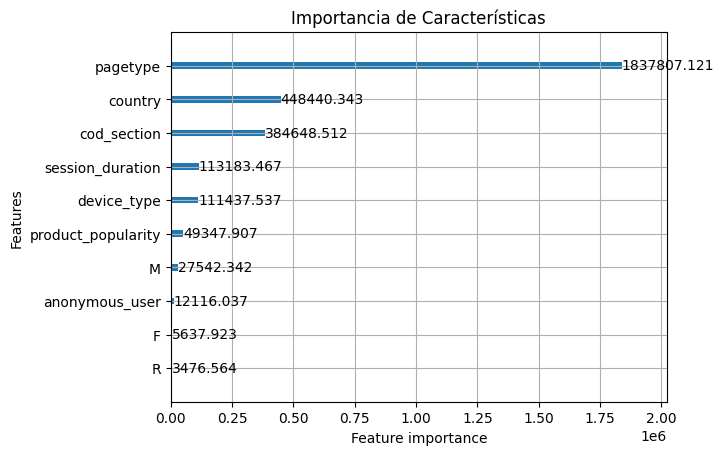

Calculando valores SHAP...


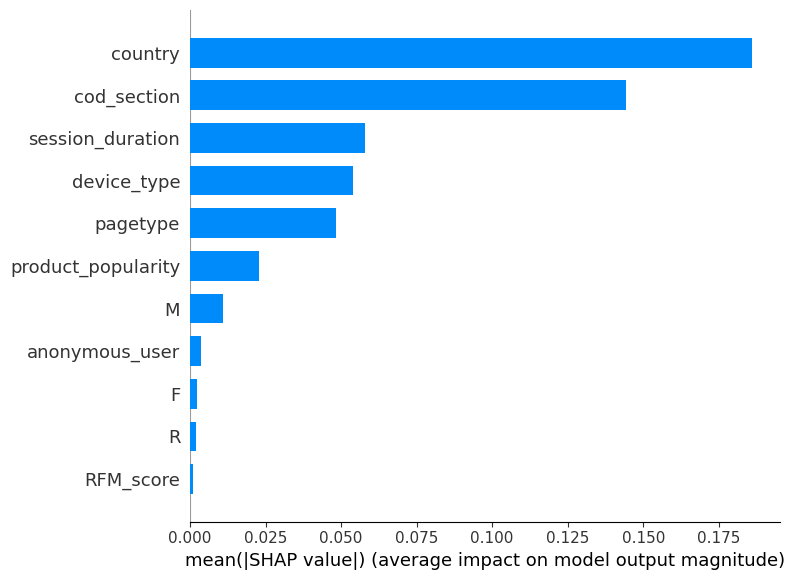

In [58]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import ndcg_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import gc

# 1. Carga de Datos
sample_fraction = 0.3
train_sample = train_full.sample(frac=sample_fraction, random_state=42)
data = train_sample.copy()

print("Distribución de 'add_to_cart' en el dataset de muestra:")
print(data["add_to_cart"].value_counts(normalize=True))

del train_sample
gc.collect()

# 2. Preprocesamiento de Datos

# Conversión y cálculo de características
data['timestamp_local'] = pd.to_datetime(data['timestamp_local'])
data["session_duration"] = data.groupby("session_id")["timestamp_local"].transform(lambda x: (x.max() - x.min()).total_seconds())
product_popularity = data["partnumber"].value_counts(normalize=True)
data["product_popularity"] = data["partnumber"].map(product_popularity)
data["RFM_score"] = data["R"] * data["F"] * data["M"]

categorical_features = ["pagetype", "device_type", "anonymous_user", "country", "cod_section"]
for col in categorical_features:
    if col in data.columns:
        data[col] = data[col].astype("category")

features = ["pagetype", "device_type", "anonymous_user", "country", "cod_section",
            "session_duration", "product_popularity", "RFM_score", "R", "F", "M"]
target = "add_to_cart"

# 3. Filtrar sesiones con menos de dos elementos
def filter_sessions_with_enough_items(df):
    session_counts = df['session_id'].value_counts()
    valid_sessions = session_counts[session_counts > 1].index
    return df[df['session_id'].isin(valid_sessions)].copy()

data = filter_sessions_with_enough_items(data)

# 4. División en conjuntos de entrenamiento y validación
unique_sessions = data['session_id'].unique()
train_sessions, val_sessions = train_test_split(unique_sessions, test_size=0.2, random_state=42)

train_data = data[data['session_id'].isin(train_sessions)].copy()
val_data = data[data['session_id'].isin(val_sessions)].copy()

# Volver a filtrar después de la división (opcional)
train_data = filter_sessions_with_enough_items(train_data)
val_data = filter_sessions_with_enough_items(val_data)

# 5. Preparación de grupos para lambdarank
group_train = train_data.groupby('session_id').size().tolist()
group_val = val_data.groupby('session_id').size().tolist()

# 6. Preparar los conjuntos de características y etiquetas
X_train = train_data[features]
y_train = train_data[target]
X_val = val_data[features]
y_val = val_data[target]

# Liberar memoria
del data, train_data, val_data
gc.collect()

# 7. Configuración de Parámetros del Modelo
params = {
    'objective': 'lambdarank',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': 6,
    'min_data_in_leaf': 50,
    'min_gain_to_split': 0.1,
    'feature_fraction': 0.8,
    'lambda_l1': 1.0,
    'lambda_l2': 1.0,
    'max_bin': 255,
    'verbose': -1,
    'random_state': 42,
    'metric': ['ndcg'],  # Usamos NDCG como métrica de evaluación
    'eval_at': [5, 10],  # Evaluamos en los cortes @5 y @10
}

# 8. Creación de Datasets de LightGBM
train_dataset = lgb.Dataset(X_train, label=y_train, group=group_train, categorical_feature=categorical_features)
valid_dataset = lgb.Dataset(X_val, label=y_val, group=group_val, categorical_feature=categorical_features, reference=train_dataset)

# 9. Entrenamiento del Modelo
from lightgbm import early_stopping, log_evaluation

model = lgb.train(
    params,
    train_dataset,
    valid_sets=[train_dataset, valid_dataset],
    num_boost_round=1000,
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=50)
    ]
)

# 10. Evaluación del Modelo
# Obtenemos las predicciones
y_pred = model.predict(X_val, num_iteration=model.best_iteration)

# Calculamos NDCG utilizando scikit-learn
# Necesitamos agrupar las predicciones y etiquetas por sesión
def calculate_ndcg(y_true, y_score, group, k=5):
    ndcg_values = []
    pos = 0
    for g in group:
        y_true_group = y_true[pos:pos+g]
        y_score_group = y_score[pos:pos+g]
        if g > 1 and np.sum(y_true_group) > 0:
            ndcg = ndcg_score([y_true_group], [y_score_group], k=k)
            ndcg_values.append(ndcg)
        pos += g
    if ndcg_values:
        return np.mean(ndcg_values)
    else:
        return 0.0

ndcg_5 = calculate_ndcg(y_val.values, y_pred, group_val, k=5)
ndcg_10 = calculate_ndcg(y_val.values, y_pred, group_val, k=10)

print(f"NDCG@5: {ndcg_5:.4f}")
print(f"NDCG@10: {ndcg_10:.4f}")

# 11. Importancia de Características
lgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Importancia de Características")
plt.show()

# 12. Análisis con SHAP (opcional)
print("Calculando valores SHAP...")
explainer = shap.TreeExplainer(model)
X_val_sample = X_val.sample(n=1000, random_state=42)
shap_values = explainer.shap_values(X_val_sample)

shap.summary_plot(shap_values, X_val_sample, plot_type="bar")

Generador json Lambdarank

In [59]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler
import json
import gc

# 1. Preparar el dataset de prueba
# Asegúrate de que 'test_full' es tu DataFrame de prueba
test_data = test_full.copy()

# Liberar memoria si es necesario
gc.collect()

# 2. Preprocesamiento de Datos en el Conjunto de Prueba

# Convertir 'timestamp_local' a datetime si no lo es
if not np.issubdtype(test_data['timestamp_local'].dtype, np.datetime64):
    test_data['timestamp_local'] = pd.to_datetime(test_data['timestamp_local'])

# Calcular la duración de la sesión (session_duration)
test_data["session_duration"] = (
    test_data.groupby("session_id")["timestamp_local"]
    .transform(lambda x: (x.max() - x.min()).total_seconds())
)

# Calcular popularidad del producto basada en el entrenamiento
# Asegúrate de tener 'product_popularity' desde el entrenamiento
if 'product_popularity' in globals():
    test_data["product_popularity"] = test_data["partnumber"].map(product_popularity).fillna(0)
else:
    # Si no está disponible, puedes calcularlo con test_data, pero es mejor usar el del entrenamiento
    test_data["product_popularity"] = test_data["partnumber"].map(test_data["partnumber"].value_counts(normalize=True))

# Crear características derivadas
test_data["RFM_score"] = test_data["R"] * test_data["F"] * test_data["M"]

# Convertir variables categóricas a tipo 'category'
categorical_features = ["pagetype", "device_type", "anonymous_user", "country", "cod_section"]
for col in categorical_features:
    if col in test_data.columns:
        test_data[col] = test_data[col].astype("category")
    else:
        print(f"Advertencia: La columna '{col}' no existe en el conjunto de prueba.")

# Asegurarse de que todas las características existen en el conjunto de prueba
features = ["pagetype", "device_type", "anonymous_user", "country", "cod_section",
            "session_duration", "product_popularity", "RFM_score", "R", "F", "M"]

missing_features = [col for col in features if col not in test_data.columns]
if missing_features:
    raise KeyError(f"Las siguientes características no se encontraron en el conjunto de prueba: {missing_features}")

# 3. Preparar los datos de entrada para el modelo
X_test = test_data[features]

# 4. Realizar predicciones
# Asegúrate de que 'model' está entrenado y disponible
# Si no lo está, necesitarás cargarlo desde un archivo guardado
if 'model' in globals():
    pass  # El modelo ya está disponible
else:
    # Cargar el modelo desde el archivo si es necesario
    model = lgb.Booster(model_file='lightgbm_model.txt')

# Realizar las predicciones
y_pred_test = model.predict(X_test, num_iteration=model.best_iteration)

# Agregar las predicciones al conjunto de datos de prueba
test_data["predicted_score"] = y_pred_test

# 5. Generar las recomendaciones

# Función para obtener las 5 mejores recomendaciones por sesión
def get_top_5_recommendations(group):
    # Ordenar los productos por el puntaje predicho
    top_products = group.sort_values(by="predicted_score", ascending=False)["partnumber"].unique()
    return list(top_products[:5])

# Generar recomendaciones por sesión
recommendations = (
    test_data.groupby("session_id")
    .apply(get_top_5_recommendations)
    .to_dict()
)

# 6. Manejar sesiones con menos de 5 productos
# Generar una lista global de productos más populares como respaldo
global_top_recommendations = (
    test_data["partnumber"]
    .value_counts()
    .index.tolist()
)

# Función para asegurar 5 productos únicos por sesión
def ensure_top_5_recommendations(rec_list, global_top):
    if len(rec_list) < 5:
        additional_products = [p for p in global_top if p not in rec_list]
        rec_list.extend(additional_products[:5 - len(rec_list)])
    return rec_list[:5]

# Aplicar la función para asegurar 5 recomendaciones por sesión
recommendations = {
    session_id: ensure_top_5_recommendations(products, global_top_recommendations)
    for session_id, products in recommendations.items()
}

# 7. Convertir las claves y valores a tipos serializables
output_json = {
    "target": {str(int(session_id)): [(int(p)) for p in products] for session_id, products in recommendations.items()}
}

# 8. Guardar el archivo JSON
with open("submission.json", "w") as f:
    json.dump(output_json, f, indent=4)

print("Archivo 'submission.json' generado con éxito.")

/tmp/ipykernel_7740/634292591.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(get_top_5_recommendations)


Archivo 'submission.json' generado con éxito.


---

# Predicciones

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler
import json

# Preparar el dataset de prueba
test_data = test_full.copy()

# Calcular duración de la sesión
test_data["session_duration"] = (
    test_data.groupby("session_id")["timestamp_local"]
    .transform(lambda x: (x.max() - x.min()).total_seconds())
)

# Calcular popularidad del producto basada en el entrenamiento
test_data["product_popularity"] = test_data["partnumber"].map(product_popularity).fillna(0)

# Crear características derivadas
test_data["RFM_score"] = test_data["R"] * test_data["F"] * test_data["M"]

test_data["interaction_section_country"] = (
    test_data["cod_section"].astype(str) + "_" + test_data["country"].astype(str)
)

test_data["interaction_section_country_encoded"] = test_data["interaction_section_country"].map(interaction_mapping).fillna(-1)

# Variables independientes para el conjunto de prueba
features = [
    "pagetype", "device_type", "R", "F", "M", "anonymous_user", "country",
    "cod_section", "session_duration", "product_popularity", "RFM_score",
    "interaction_section_country_encoded"
]
X_test = test_data[features]

# Realizar predicciones
y_pred_test = model_2.predict(X_test)

# Normalizar probabilidades
scaler = MinMaxScaler()
y_scores_test_normalized = scaler.fit_transform(y_pred_test.reshape(-1, 1)).flatten()

# Incorporar predicciones al dataset de prueba
test_data["predicted_score"] = y_scores_test_normalized

# Generar una lista global de productos más populares como respaldo
global_top_recommendations = (
    test_data["partnumber"]
    .value_counts()
    .index.tolist()
)

# Función para obtener las 5 mejores recomendaciones con respaldo basado en popularidad
def get_top_5_recommendations_with_popularity(group, global_top):
    # Obtener los productos con mejor puntuación en la sesión
    unique_partnumbers = group.sort_values(by="predicted_score", ascending=False)["partnumber"].unique()
    top_recommendations = list(unique_partnumbers[:5])
    
    # Rellenar con productos más populares si es necesario
    if len(top_recommendations) < 5:
        additional_from_global = [p for p in global_top if p not in top_recommendations]
        top_recommendations.extend(additional_from_global[:5 - len(top_recommendations)])
    
    return top_recommendations

# Generar recomendaciones por sesión asegurando 5 productos únicos
recommendations = (
    test_data.groupby("session_id", group_keys=False)
    .apply(lambda group: get_top_5_recommendations_with_popularity(group, global_top_recommendations))
    .to_dict()
)

# Convertir las claves y valores a tipos serializables
output_json = {
    "target": {int(session_id): [int(p) for p in products] for session_id, products in recommendations.items()}
}

# Guardar el archivo JSON
with open("submission.json", "w") as f:
    json.dump(output_json, f, indent=4)

print("Archivo 'submission.json' generado con éxito.")


---